[[38.4615, 41.0256, 12.8205], [41.0256, 43.5897, 64.1026], [74.359, 58.9744, 71.7949], [51.2821, 38.4615, 64.1026], [69.2308, 35.8974, 76.9231]]


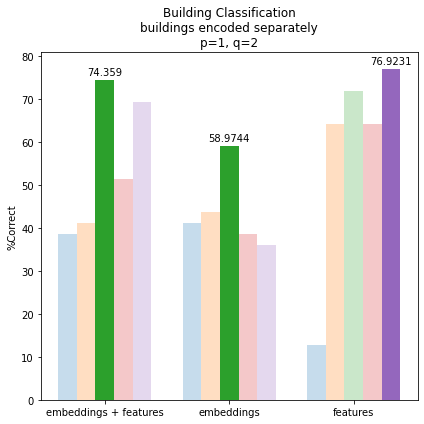

In [186]:
"""
Visualize vignette 2 data

https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

"""

import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load building experiment data
file = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\mosque_monastery_classification_bldg_summary.csv')
# file = os.path.join(os.path.dirname(os.getcwd()), 'data\experiments\mosque_monastery_classification_node_summary.csv')

header = []
rows = []
with open(file, 'r', encoding='utf-8-sig') as file:
    reader = csv.reader(file)
    header = next(reader)
    for row in reader:
        rows.append(row)

# create one test plot first
ef = header.index('1_1_ef')
e  = header.index('1_1_e')
f  = header.index('1_1_f')

classifiers = ['svm', 'svmpk', 'dt', 'rf', 'nb']

table1 = []
for row in rows:
    table1.append([float(i.strip("\'")) for i in row[ef:f + 1]])
    
labels = ['embeddings + features', 'embeddings', 'features']

x = np.arange(len(labels))
width = 0.15

print(table1)

fig, ax = plt.subplots(figsize=(6, 6))
rects1 = ax.bar(x - width * 2, table1[0], width, label=classifiers[0], alpha=0.25)
rects2 = ax.bar(x - width, table1[1], width, label=classifiers[1], alpha=0.25)
rects3 = ax.bar(x, table1[2], width, label=classifiers[2], alpha=0.25)
rects4 = ax.bar(x + width, table1[3], width, label=classifiers[3], alpha=0.25)
rects5 = ax.bar(x + width * 2, table1[4], width, label=classifiers[4], alpha=0.25)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%Correct')
ax.set_title('Building Classification\nbuildings encoded separately\np=1, q=2')
# ax.set_title('Node Classification\nbuildings encoded separately\np=1, q=2')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.legend()

rect_set = [rects1, rects2, rects3, rects4, rects5]

for i in range(len(rect_set[0])):
    maxH = 0
    best = 0
    for j in range(len(rect_set)):
        if rect_set[j][i].get_height() > maxH:
            maxH = rect_set[j][i].get_height()
            best = rect_set[j][i]
    best.set_alpha(1)
    height = best.get_height()
    ax.annotate('{}'.format(height),
                xy=(best.get_x() + best.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
# plt.show()


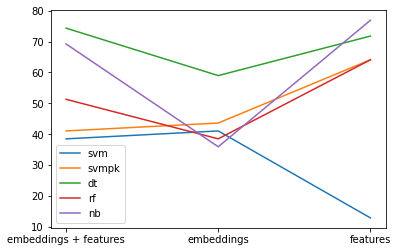

In [187]:
"""
https://matplotlib.org/3.3.3/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
"""

fig, ax = plt.subplots()

ax.plot(labels, table1[0], label=classifiers[0])
ax.plot(labels, table1[1], label=classifiers[1])
ax.plot(labels, table1[2], label=classifiers[2])
ax.plot(labels, table1[3], label=classifiers[3])
ax.plot(labels, table1[4], label=classifiers[4])
ax.legend()


plt.show()

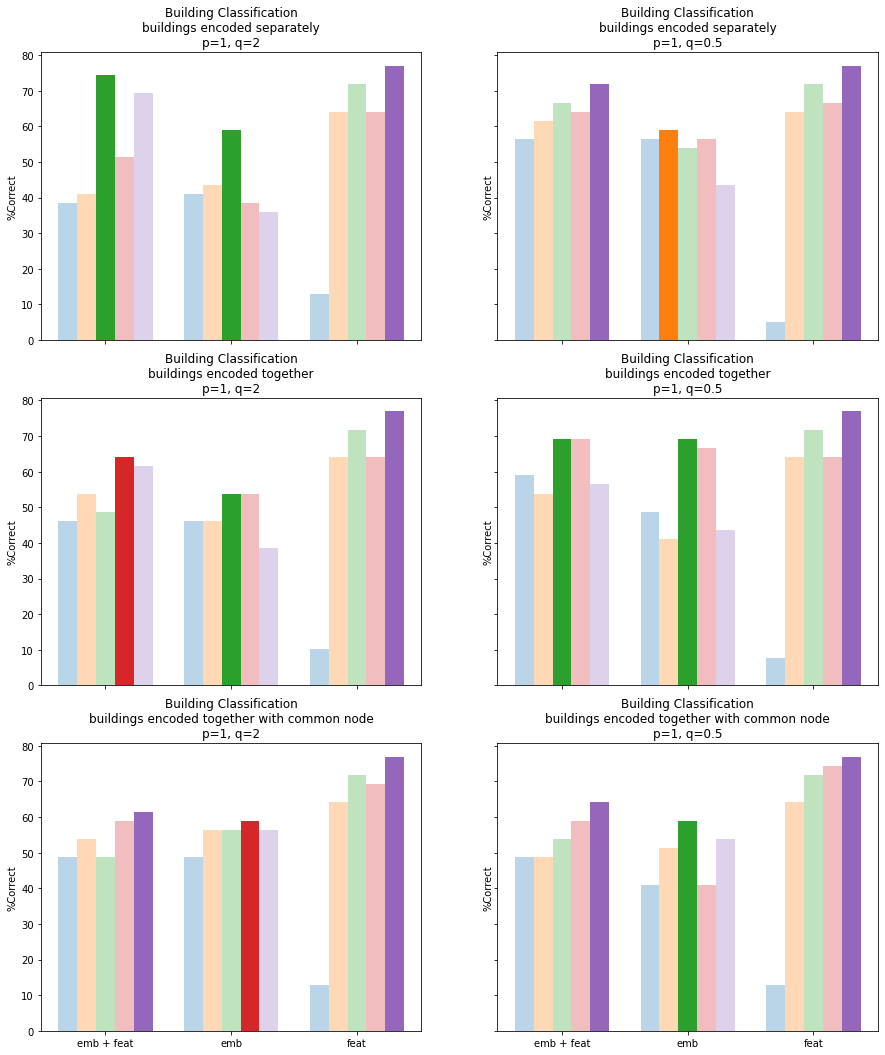

In [188]:
"""
multiple plots

https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html

"""

tables = []
for i, c in enumerate(range(1, len(header), 3)):
    table = []
    for row in rows:
        table.append([float(i.strip("\'")) for i in row[c:c + 3]])
    tables.append(table)

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(15,18))

titles_bldgs= ['Building Classification\nbuildings encoded separately\np=1, q=2',
              'Building Classification\nbuildings encoded separately\np=1, q=0.5',
              'Building Classification\nbuildings encoded together\np=1, q=2',
              'Building Classification\nbuildings encoded together\np=1, q=0.5',
              'Building Classification\nbuildings encoded together with common node\np=1, q=2',
              'Building Classification\nbuildings encoded together with common node\np=1, q=0.5']

titles_nodes= ['Node Classification\nbuildings encoded separately\np=1, q=2',
              'Node Classification\nbuildings encoded separately\np=1, q=0.5',
              'Node Classification\nbuildings encoded together\np=1, q=2',
              'Node Classification\nbuildings encoded together\np=1, q=0.5',
              'Node Classification\nbuildings encoded together with common node\np=1, q=2',
              'Node Classification\nbuildings encoded together with common node\np=1, q=0.5'] 

labels = ['emb + feat', 'emb', 'feat']

x = np.arange(len(labels))
width = 0.15

for t in range(6):
    row = t // 2
    col = t % 2
    rects1 = axs[row, col].bar(x - width * 2, tables[t][0], width, label=classifiers[0], alpha=0.3)
    rects2 = axs[row, col].bar(x - width, tables[t][1], width, label=classifiers[1], alpha=0.3)
    rects3 = axs[row, col].bar(x, tables[t][2], width, label=classifiers[2], alpha=0.3)
    rects4 = axs[row, col].bar(x + width, tables[t][3], width, label=classifiers[3], alpha=0.3)
    rects5 = axs[row, col].bar(x + width * 2, tables[t][4], width, label=classifiers[4], alpha=0.3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[row, col].set_ylabel('%Correct')
    axs[row, col].set_title(titles_bldgs[t])
#     axs[row, col].set_title(titles_nodes[t])
    axs[row, col].set_xticks(x)
    axs[row, col].set_xticklabels(labels)
    ax.legend()

    rect_set = [rects1, rects2, rects3, rects4, rects5]

    for i in range(len(rect_set[0])):
        maxH = 0
        best = 0
        for j in range(len(rect_set)):
            if rect_set[j][i].get_height() > maxH:
                maxH = rect_set[j][i].get_height()
                best = rect_set[j][i]
        best.set_alpha(1)
        height = best.get_height()
        ax.annotate('{}'.format(height),
                    xy=(best.get_x() + best.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
    